<a href="https://colab.research.google.com/github/Rajiji19/House-Price-Prediction/blob/main/ai_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xg

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

loading dataset

In [ ]:
dataset = pd.read_csv('USA_Housing.csv')

data exploration

In [ ]:
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

visualization and preprocessing

<Axes: xlabel='Price', ylabel='Count'>

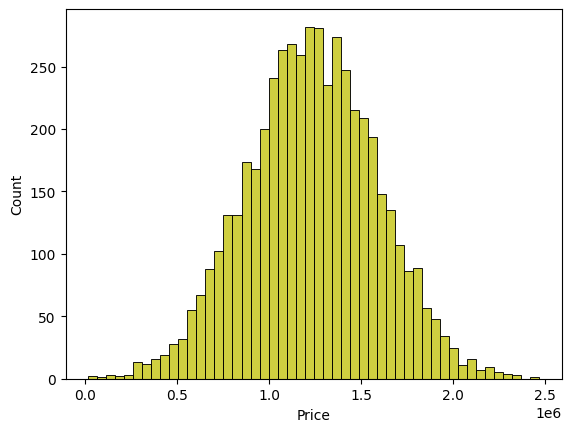

In [ ]:
sns.histplot(dataset, x='Price', bins=50, color='y')

<Axes: xlabel='Price'>

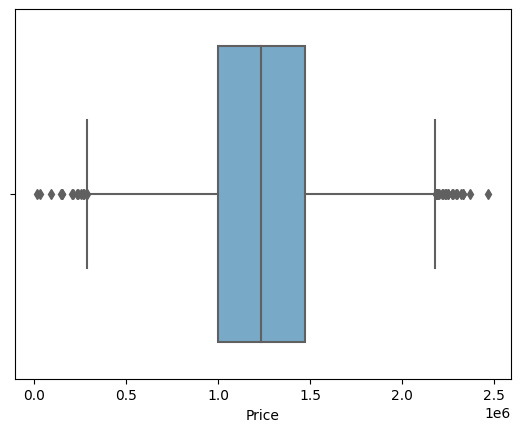

In [ ]:
sns.boxplot(dataset, x='Price',  palette='Blues')

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

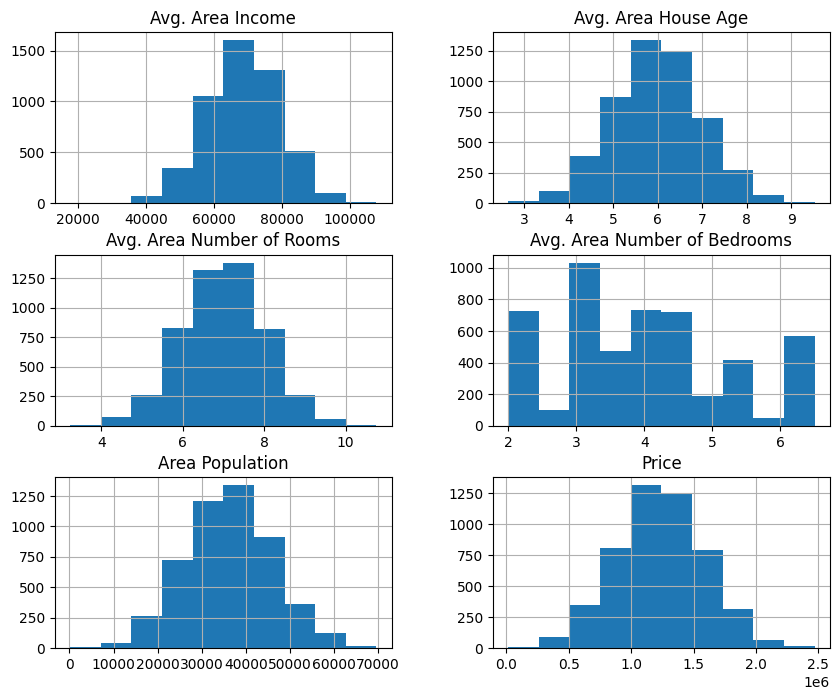

In [ ]:
dataset.hist(figsize=(10,8))

visualizing correlation

In [ ]:
dataset.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

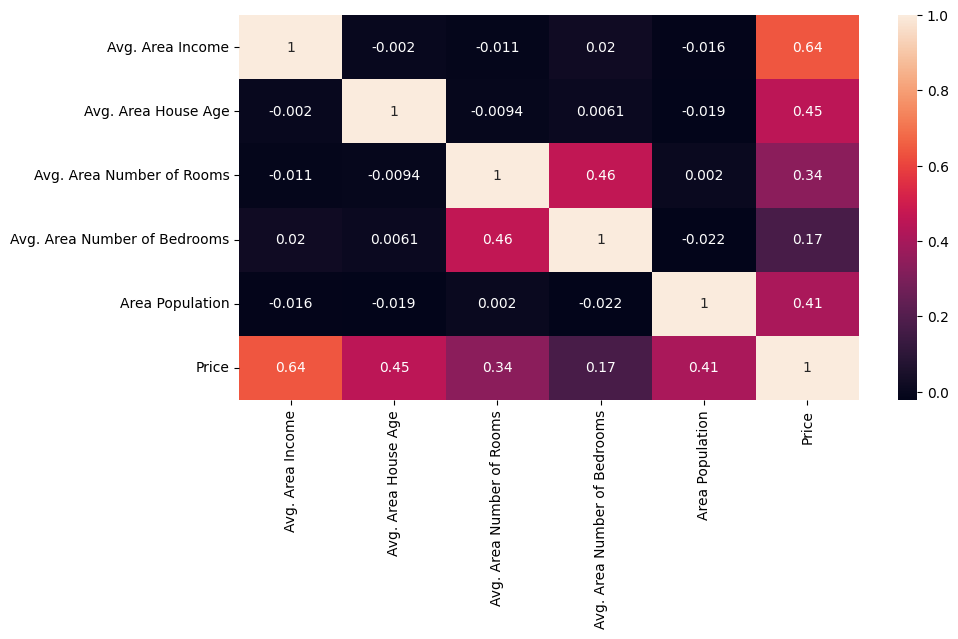

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)

Dividing Dataset into features and target variable

In [ ]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = dataset['Price']

Using Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
Y_train.head()

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
Name: Price, dtype: float64

In [ ]:
Y_train.shape

(4000,)

In [ ]:
Y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

In [ ]:
Y_test.shape

(1000,)

Standardizing the data

In [ ]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

Model Building and Evaluation


Model 1 - Linear Regression

In [ ]:
model_lr=LinearRegression()

In [ ]:
model_lr.fit(X_train_scal, Y_train)

LinearRegression()

Predicting Prices

In [ ]:
Prediction1 = model_lr.predict(X_test_scal)

Evaluation of Predicted Data

Text(0.5, 1.0, 'Actual vs Predicted')

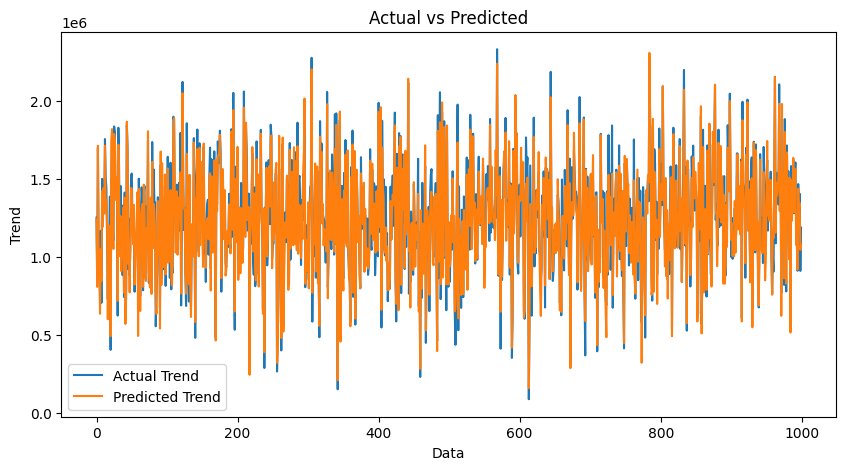

In [51]:
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction1, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

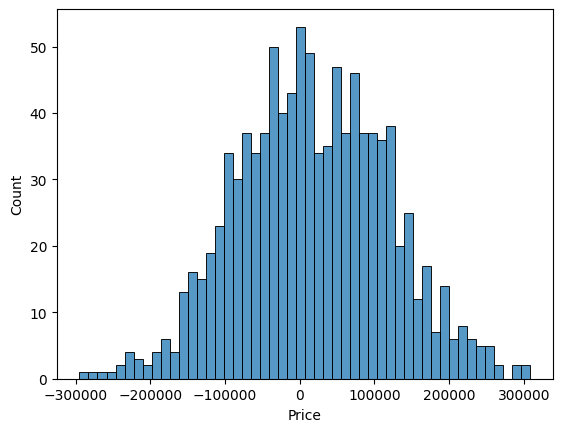

In [ ]:
sns.histplot((Y_test-Prediction1), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction1))
print(mean_absolute_error(Y_test, Prediction1))
print(mean_squared_error(Y_test, Prediction1))

0.9182928179392918
82295.49779231755
10469084772.975954


Model 2 - Support Vector Regressor


In [ ]:
model_svr = SVR()

In [ ]:
model_svr.fit(X_train_scal, Y_train)

SVR()

In [ ]:
Prediction2 = model_svr.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

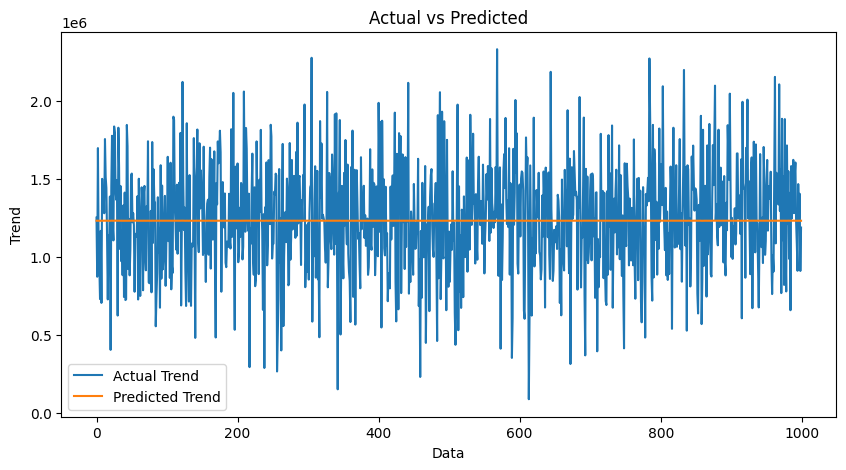

In [52]:
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction2, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

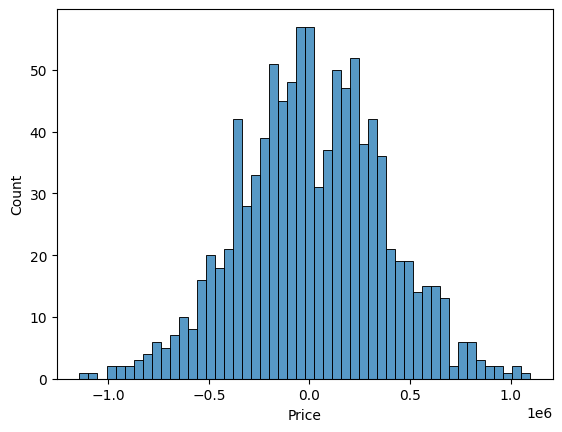

In [ ]:
sns.histplot((Y_test-Prediction2), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction2))
print(mean_absolute_error(Y_test, Prediction2))
print(mean_squared_error(Y_test, Prediction2))

-0.0006222175925689744
286137.81086908665
128209033251.4034


Model 3 - Random Forest Regressor

In [ ]:
model_rf = RandomForestRegressor(n_estimators=50)

In [ ]:
model_rf.fit(X_train_scal, Y_train)

In [ ]:
Prediction4 = model_rf.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

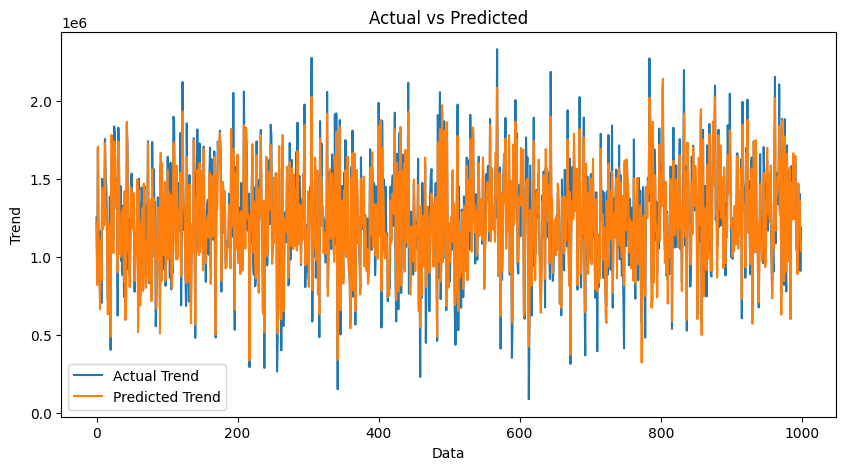

In [53]:
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction4, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

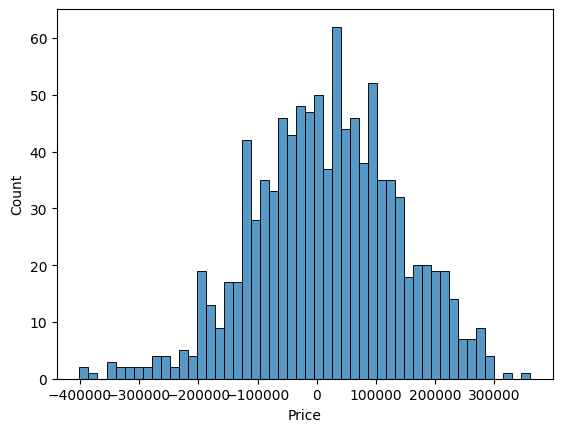

In [ ]:
sns.histplot((Y_test-Prediction4), bins=50)

In [44]:
print(r2_score(Y_test, Prediction4))
print(mean_absolute_error(Y_test, Prediction4))
print(mean_squared_error(Y_test, Prediction4))

0.8805641323024149
98883.8118245981
15303235190.890911


Model 4 - XGboost Regressor

In [ ]:
model_xg = xg.XGBRegressor()

In [ ]:
model_xg.fit(X_train_scal, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
Prediction5 = model_xg.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

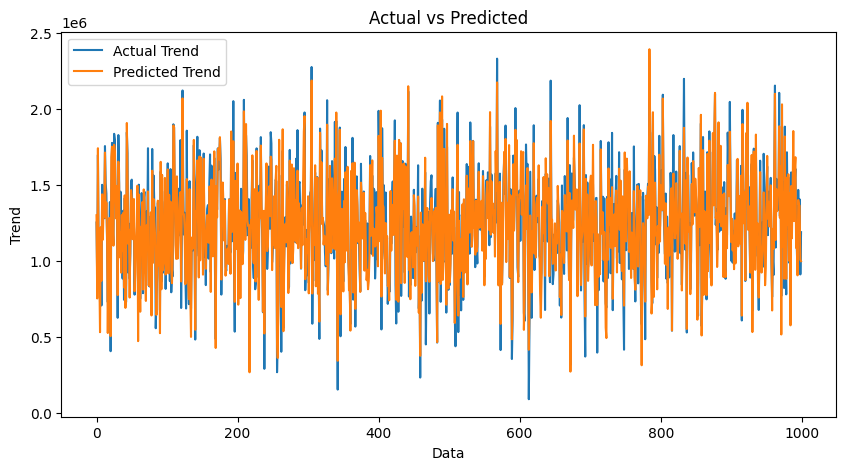

In [54]:
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction5, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

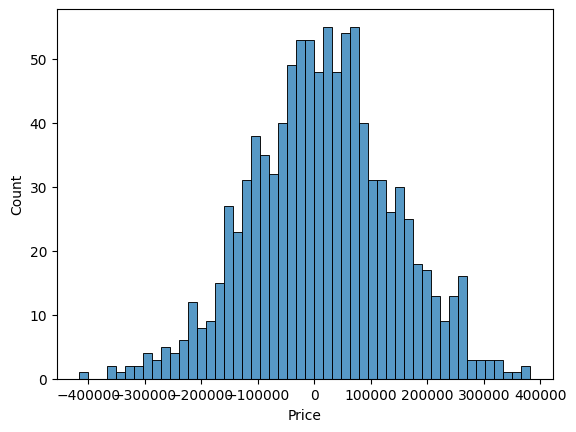

In [49]:
sns.histplot((Y_test-Prediction5), bins=50)

In [50]:
print(r2_score(Y_test, Prediction5))
print(mean_absolute_error(Y_test, Prediction5))
print(mean_squared_error(Y_test, Prediction5))

0.8749027861384089
100138.43694996461
16028619562.562243
